# Walk-Forward Analysis Results

This notebook loads the backtest results from `backtest_results.db` and visualizes the predicted vs. actual outcomes for each strategy.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Define the path to the database
# Assuming PriceData directory is located one level above the notebooks directory
db_path = os.path.join('..', 'PriceData', 'backtest_results.db')

Found strategy tables: ['ICHIMOKU_indicator', 'KELTNER_indicator', 'BBANDS_indicator', 'DEMA_indicator', 'EMA_indicator', 'HT_TRENDLINE_indicator', 'KAMA_indicator', 'MA_indicator', 'MAMA_indicator', 'MAVP_indicator', 'MIDPOINT_indicator', 'MIDPRICE_indicator', 'SAR_indicator', 'SMA_indicator', 'T3_indicator']

Processing strategy: ICHIMOKU_indicator
  Data collected for ICHIMOKU_indicator

Processing strategy: KELTNER_indicator
  Data collected for KELTNER_indicator

Processing strategy: BBANDS_indicator
  Data collected for BBANDS_indicator

Processing strategy: DEMA_indicator
  Data collected for DEMA_indicator

Processing strategy: EMA_indicator
  Data collected for EMA_indicator

Processing strategy: HT_TRENDLINE_indicator
  Data collected for HT_TRENDLINE_indicator

Processing strategy: KAMA_indicator
  Data collected for KAMA_indicator

Processing strategy: MA_indicator
  Data collected for MA_indicator

Processing strategy: MAMA_indicator
  Data collected for MAMA_indicator

Pr

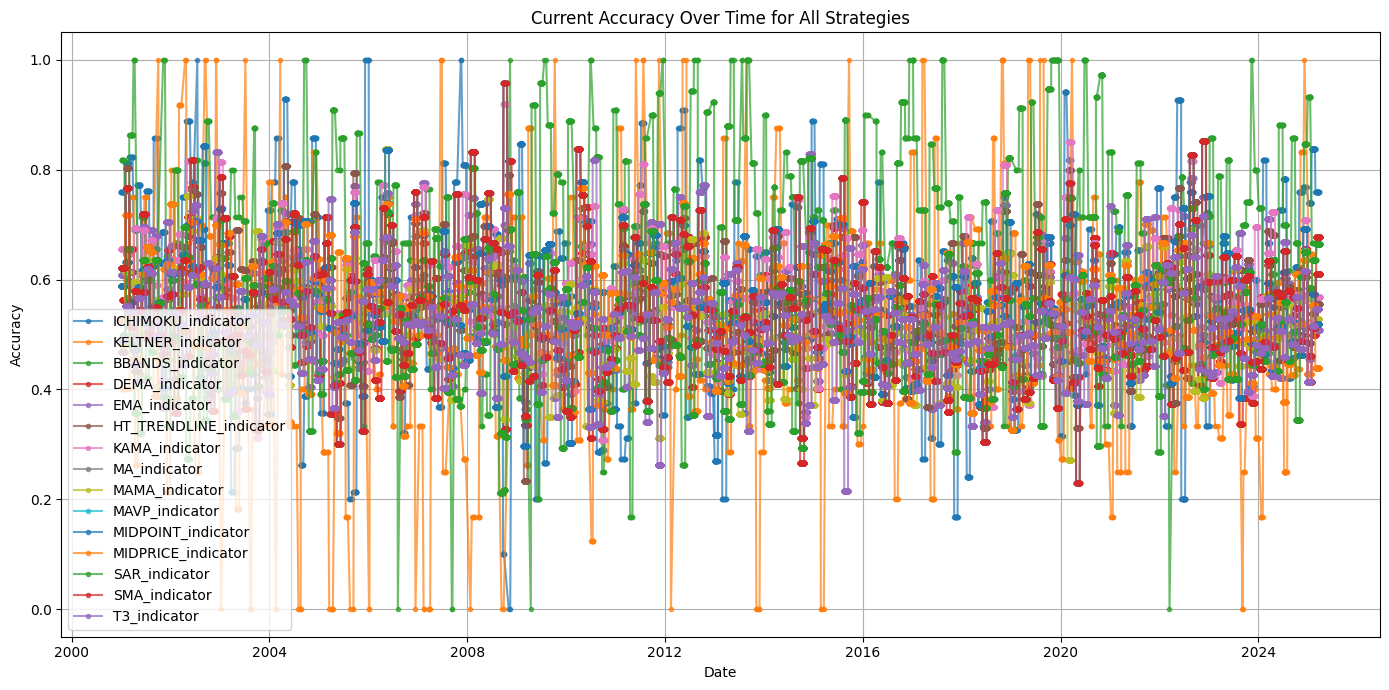

In [6]:
# Connect to the database using a context manager and process each strategy table
strategy_data = {}
try:
    with sqlite3.connect(db_path) as conn:
        # Get a list of all tables in the database
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        
        # Filter out non-strategy tables (like overall_results or sqlite internal tables)
        strategy_tables = [table[0] for table in tables if table[0] not in ['overall_results', 'sqlite_sequence']]
        
        print(f"Found strategy tables: {strategy_tables}")

        # Loop through each strategy table and collect the data
        for strategy_name in strategy_tables:
            print(f"\nProcessing strategy: {strategy_name}")
            
            try:
                # Load data for the current strategy
                query = f"SELECT * FROM {strategy_name}"
                df = pd.read_sql(query, conn)
                
                # Ensure 'date' column exists and convert to datetime
                if 'date' in df.columns:
                    df['date'] = pd.to_datetime(df['date'])
                    df = df.sort_values('date') # Sort by date for plotting
                else:
                    print(f"  Warning: 'date' column not found in table {strategy_name}. Skipping data collection.")
                    continue
                    
                # Check if required column for plotting exists
                if 'current_accuracy' not in df.columns:
                    print(f"  Warning: 'current_accuracy' column not found in table {strategy_name}. Skipping data collection.")
                    continue
        
                # Store the relevant data
                strategy_data[strategy_name] = df[['date', 'current_accuracy']].copy()
                print(f"  Data collected for {strategy_name}")
                
            except Exception as e:
                print(f"  Error processing table {strategy_name}: {e}")
    print("\nDatabase connection automatically closed.")
except sqlite3.Error as e:
    print(f"Database connection error: {e}")

# Plot all strategies on the same graph
if strategy_data:
    plt.figure(figsize=(14, 7))
    
    for strategy_name, df_strategy in strategy_data.items():
        plt.plot(df_strategy['date'], df_strategy['current_accuracy'], label=strategy_name, marker='.', linestyle='-', alpha=0.7)
        
    plt.title('Current Accuracy Over Time for All Strategies')
    plt.xlabel('Date')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No strategy data collected to plot.")